In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


### 1. Phoneme Dataset
Load the phoneme dataset using Pandas

In [2]:
data = pd.read_csv('data/phoneme.csv')
#print(data)
# TODO 
# Split the dataset into a train and test dataset according to column "speaker".
# Be sure to exclude row number, "speaker" and response columns from your features.
train=pd.DataFrame()
test=pd.DataFrame()

for i in tqdm(range(len(data))):
    if data['speaker'].iloc[i].split('.')[0] == 'train':
        train=train.append(data.iloc[i],ignore_index=True)
    elif data['speaker'].iloc[i].split('.')[0] == 'test':
        test=test.append(data.iloc[i],ignore_index=True)

X_train = train.drop(['speaker','row.names','g'],axis=1)
Y_train = train['g']
X_test = test.drop(['speaker','row.names','g'],axis=1)
Y_test = test['g']

100%|██████████████████████████████████████████████████████████████████████████████| 4509/4509 [02:07<00:00, 35.24it/s]


### 2. LDA modelling
Fit an LDA model. Compute and report the train and test error.

In [3]:
# TODO
model=LinearDiscriminantAnalysis()
model.fit(X_train,Y_train)

YtrainPred=model.predict(X_train)
YtestPred=model.predict(X_test)

trainerror=1-accuracy_score(Y_train,YtrainPred)
testerror=1-accuracy_score(Y_test,YtestPred)

print("training error: ",trainerror*100,"%")
print("test error",testerror*100,"%")

training error:  5.598802395209579 %
test error 8.041060735671513 %


### 3. LDA canonical coordinates
 Plot the projection of the training data onto the first two canonical coordinates of the LDA and report your findings. Investigate the data projected on further dimensions using the \texttt{dimen} parameter.

In [4]:
# TODO 
lda = LinearDiscriminantAnalysis(n_components=4)
tran = lda.fit(X_train, Y_train).transform(X_train)

In [5]:
plot_df = Y_train
new = plot_df.replace(['sh', 'iy', 'dcl', 'aa', 'ao'], [0,1,2,3,4])

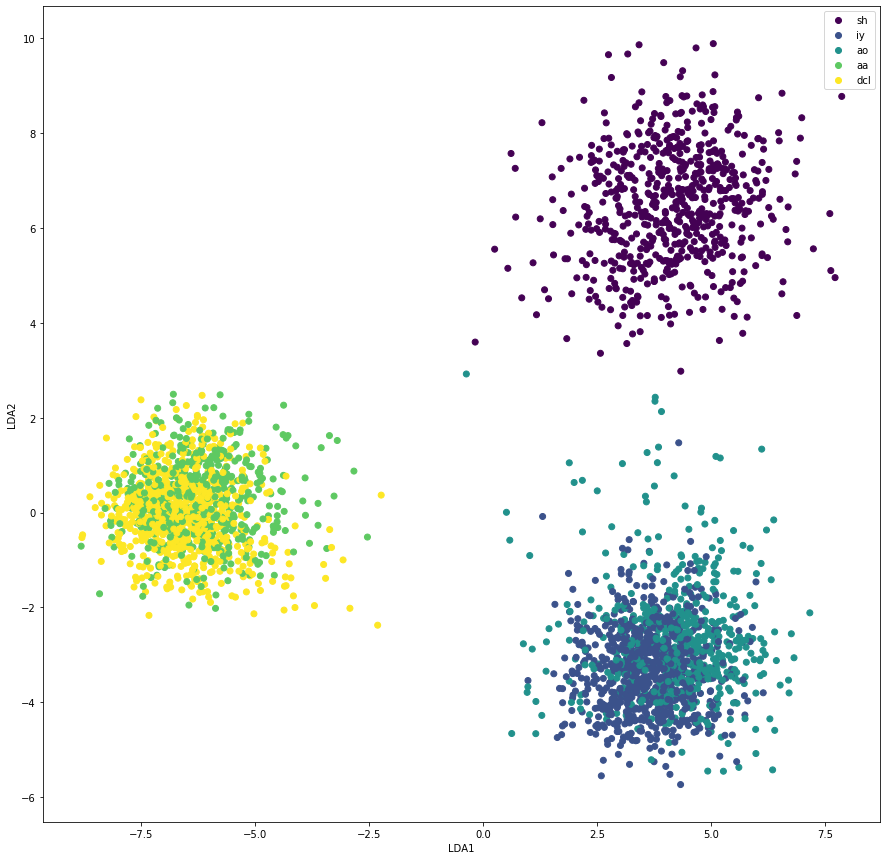

In [6]:
plt.figure(figsize=(15, 15))
plt.xlabel("LDA1")
plt.ylabel("LDA2")
a = plt.scatter(tran[:,0],tran[:,1],  c=new)
plt.legend(a.legend_elements()[0], list(set(Y_train)))
plt.show()

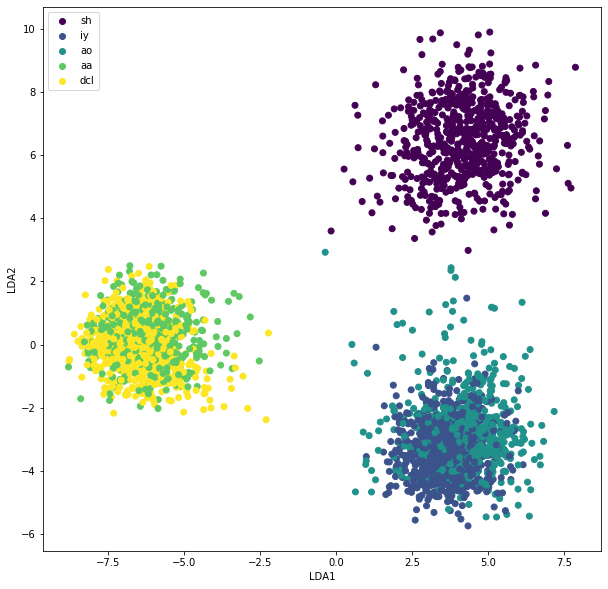

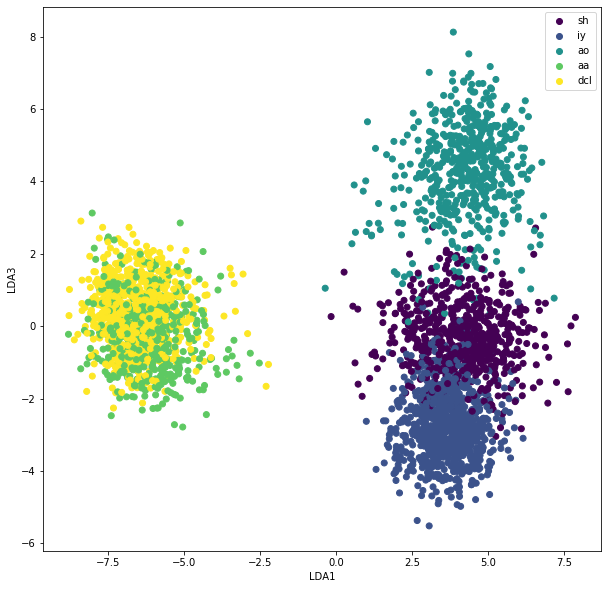

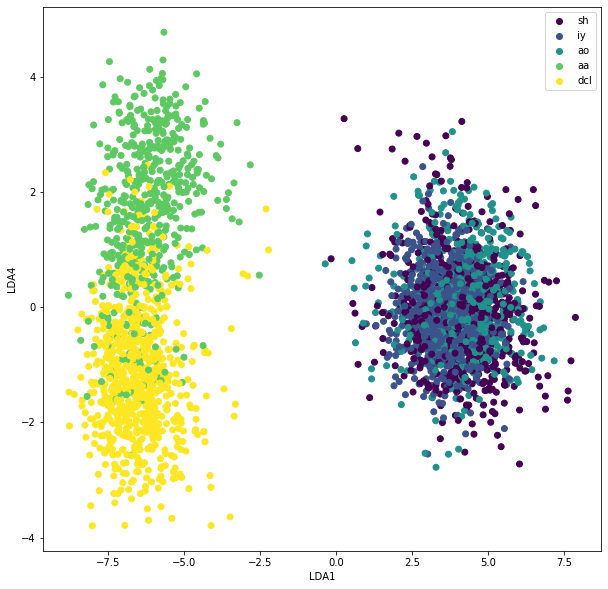

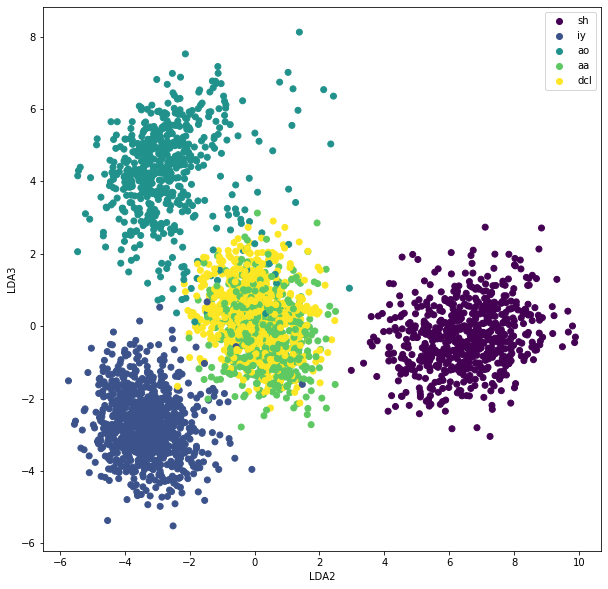

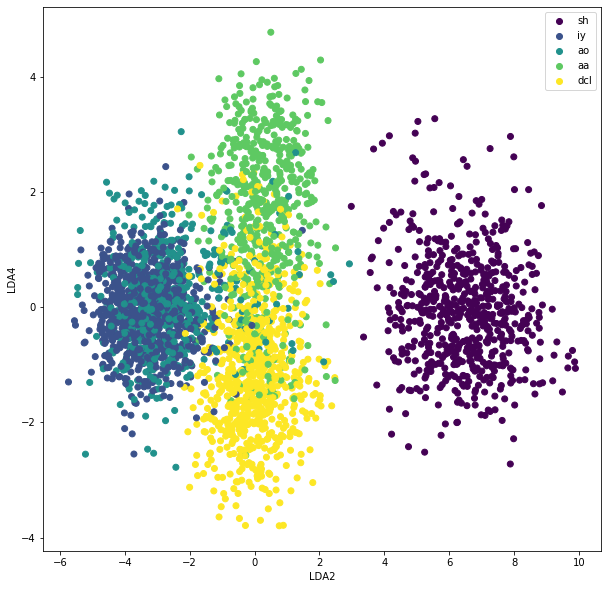

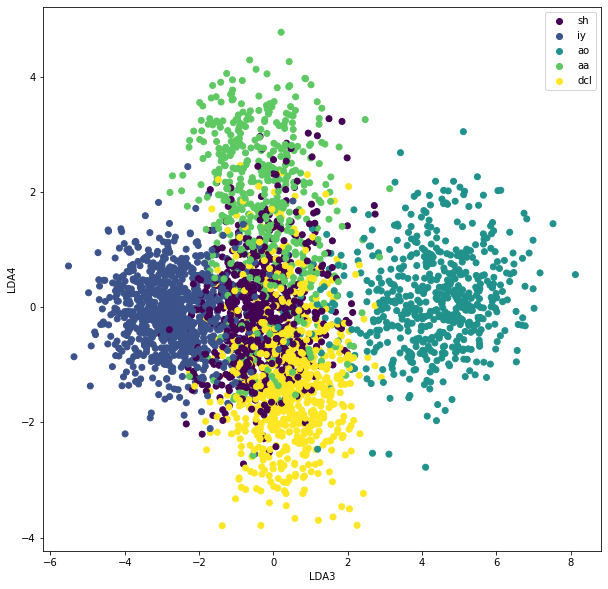

In [7]:
list_fig = [[0,1],[0,2], [0,3], [1,2], [1,3], [2,3]]

for i in range(len(list_fig)):
    plt.figure(figsize=(10, 10))
    plt.xlabel("LDA"+str(list_fig[i][0] + 1))
    plt.ylabel("LDA"+str(list_fig[i][1] + 1))
    a = plt.scatter(tran[:,list_fig[i][0]],tran[:,list_fig[i][1]],  c=new)
    plt.legend(a.legend_elements()[0], list(set(Y_train)))
    plt.show()

### 4. LDA on "aa", "ao"
Select the two phonemes "aa" and "ao". Fit an LDA model on this data set and repeat the steps
    done in (2).

In [8]:
X_train2=train.loc[(train['g']=='aa')|(train['g']=='ao')].drop(['speaker','row.names','g'],axis=1)
Y_train2=train.loc[(train['g']=='aa')|(train['g']=='ao')]['g']
X_test2=test.loc[(test['g']=='aa')|(test['g']=='ao')].drop(['speaker','row.names','g'],axis=1)
Y_test2=test.loc[(test['g']=='aa')|(test['g']=='ao')]['g']

model=LinearDiscriminantAnalysis()
model.fit(X_train2,Y_train2)

YtrainPred2=model.predict(X_train2)
YtestPredLDA=model.predict(X_test2)

trainerror=1-accuracy_score(Y_train2,YtrainPred2)
testerror=1-accuracy_score(Y_test2,YtestPredLDA)
print("LDA with 'aa' and 'ao':\n")

print("training error: ",trainerror*100,"%")
print("test error",testerror*100,"%")

LDA with 'aa' and 'ao':

training error:  10.641627543035991 %
test error 21.4123006833713 %


## 5. QDA
Repeat steps (b) and (d) using QDA and report your findings. Would you prefer LDA or QDA in this example? Why?

In [9]:
## Fitting on the entire dataset:
model=QuadraticDiscriminantAnalysis()
model.fit(X_train,Y_train)

YtrainPred=model.predict(X_train)
YtestPred=model.predict(X_test)

trainerror=1-accuracy_score(Y_train,YtrainPred)
testerror=1-accuracy_score(Y_test,YtestPred)
print("Errors after training on the entire dataset:\n")
print("training error:",trainerror*100,"%")
print("testing error:",testerror*100,"%")

## Fitting on 'aa' and 'ao'
model=QuadraticDiscriminantAnalysis()
model.fit(X_train2,Y_train2)

YtrainPred=model.predict(X_train2)
YtestPredQDA=model.predict(X_test2)

trainerror=1-accuracy_score(Y_train2,YtrainPred)
testerror=1-accuracy_score(Y_test2,YtestPredQDA)
print("Errors after training on the 'aa' and 'ao':\n")
print("training error:",trainerror*100,"%")
print("testing error:",testerror*100,"%")

Errors after training on the entire dataset:

training error: 0.0 %
testing error: 15.82549187339607 %
Errors after training on the 'aa' and 'ao':

training error: 0.0 %
testing error: 33.94077448747153 %


## 6. Confusion Matrices
Generate confusion matrices for the LDA and QDA model for "aa" and "ao". Which differences can you observe between the models?

In [10]:
# TODO 
## LDA confusion matrix
print("Confusion matrix for LDA:\n")
tn, fp, fn, tp = confusion_matrix(Y_test2,YtestPredLDA).ravel()
print(confusion_matrix(Y_test2,YtestPredLDA))
## QDA confusion matrix
print("\nConfusion matrix for QDA:\n")
tn2, fp2, fn2, tp2 = confusion_matrix(Y_test2,YtestPredQDA).ravel()
print(confusion_matrix(Y_test2,YtestPredQDA))

Confusion matrix for LDA:

[[121  55]
 [ 39 224]]

Confusion matrix for QDA:

[[ 29 147]
 [  2 261]]


#### Observation:
The LDA model has a better class based performance than the QDA model. This is because the False positive of the QDA model on the test data is significantly high resulting in a low specificity(0.16) and hence corresponding high sensitivity (0.99). On the other hand LDA model has better balance with a specificity of 0.6875 and sensitivity of 0.85